<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Library python yang dipakai

import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import math
import os #library lokasi path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [5]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi/')
print(tidakTerinfeksi_data)

['C38P3thinF_original_IMG_20150621_112043_cell_203.png', 'C38P3thinF_original_IMG_20150621_112116_cell_204.png', 'C38P3thinF_original_IMG_20150621_112116_cell_205.png', 'C38P3thinF_original_IMG_20150621_112138_cell_183.png', 'C38P3thinF_original_IMG_20150621_112246_cell_236.png', 'C39P4thinF_original_IMG_20150622_105102_cell_82.png', 'C39P4thinF_original_IMG_20150622_105102_cell_81.png', 'C39P4thinF_original_IMG_20150622_105102_cell_79.png', 'C39P4thinF_original_IMG_20150622_105102_cell_83.png', 'C39P4thinF_original_IMG_20150622_105102_cell_80.png', 'C39P4thinF_original_IMG_20150622_105102_cell_86.png', 'C39P4thinF_original_IMG_20150622_105102_cell_96.png', 'C39P4thinF_original_IMG_20150622_105102_cell_88.png', 'C39P4thinF_original_IMG_20150622_105102_cell_87.png', 'C39P4thinF_original_IMG_20150622_105102_cell_99.png', 'C39P4thinF_original_IMG_20150622_105102_cell_95.png', 'C39P4thinF_original_IMG_20150622_105102_cell_93.png', 'C39P4thinF_original_IMG_20150622_105102_cell_91.png', 'C39

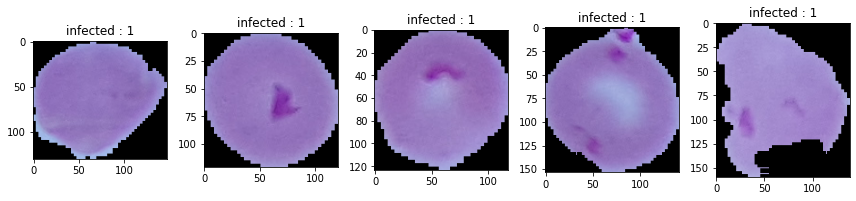

In [7]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img)
    plt.title('infected : 1')
    plt.tight_layout()
plt.show()

In [0]:
#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()
plt.show()